In [1]:
#importing all the required libraries
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import Credentials
import json
import re
import tweepy as tw
import pandas as pd

authorization=OAuthHandler(Credentials.CONSUMER_KEY,Credentials.CONSUMER_KEY_SECRET)
authorization.set_access_token(Credentials.ACCESS_TOKEN,Credentials.ACCESS_TOKEN_SECRET)


In [2]:
#extracting 1000 tweets using tweepy search API
api = tw.API(authorization)
tweets=[]
for tweet in tw.Cursor(api.search, q=('Canada OR Canada+import OR Canada+export OR Canada+vehicle+sales OR Canada+Education'), lang = 'en', tweet_mode='extended').items(1000):
    if 'retweeted_status' in tweet._json:
        tweet_final=tweet.retweeted_status.full_text
        tweets.append(tweet_final)
    else:
        tweet_final=tweet.full_text
        tweets.append(tweet_final)
len(tweets)

1000

In [3]:
tweets[0]

'Meet “Jessica Yaniv,” a Jewish (of course) trans activist. He’s suing a home-based salon owner in British Columbia after they refused to wax his hairy Jew balls. As a result, the salon owner now has to face Canada’s Human Right Tribunal. \n\nWAX THE BALLS, BIGOT! https://t.co/gHqlhg1zte'

In [4]:
#cleaning the tweets to remove urls and non alphabet characters
regex = re.compile('[^a-zA-Z0-9\+\-]')
dic={}
cleaned_tweets=[]
counter=0
for tweet in tweets:
    dic[counter]=[]
    tweet_tokens=tweet.split()
    clean_tweet=""
    for token in tweet_tokens:
        if "http" not in token:
            new_token=regex.sub('', token)
            if new_token not in (''):
                dic[counter].append(new_token)
                clean_tweet=clean_tweet+" "+new_token
    counter=counter+1
    cleaned_tweets.append(clean_tweet.strip())
len(dic)

1000

In [5]:
cleaned_tweets[0]

'Meet Jessica Yaniv a Jewish of course trans activist Hes suing a home-based salon owner in British Columbia after they refused to wax his hairy Jew balls As a result the salon owner now has to face Canadas Human Right Tribunal WAX THE BALLS BIGOT'

In [6]:
#creating bag of words for each tweet
bow_list=[]
for key in dic:
    words_check=[]
    bag={}
    for word in dic[key]:
        if word in words_check:
            bag[word]=bag[word]+1
        else:
            words_check.append(word)
            bag[word]=1
    bow_list.append(bag)
bow_list[0]        
#bow_list

{'Meet': 1,
 'Jessica': 1,
 'Yaniv': 1,
 'a': 3,
 'Jewish': 1,
 'of': 1,
 'course': 1,
 'trans': 1,
 'activist': 1,
 'Hes': 1,
 'suing': 1,
 'home-based': 1,
 'salon': 2,
 'owner': 2,
 'in': 1,
 'British': 1,
 'Columbia': 1,
 'after': 1,
 'they': 1,
 'refused': 1,
 'to': 2,
 'wax': 1,
 'his': 1,
 'hairy': 1,
 'Jew': 1,
 'balls': 1,
 'As': 1,
 'result': 1,
 'the': 1,
 'now': 1,
 'has': 1,
 'face': 1,
 'Canadas': 1,
 'Human': 1,
 'Right': 1,
 'Tribunal': 1,
 'WAX': 1,
 'THE': 1,
 'BALLS': 1,
 'BIGOT': 1}

In [7]:
len(bow_list)

1000

In [8]:
#creating a data frame with tweet message, polarity and matched words
df = pd.DataFrame(columns=['Tweet', 'Message', 'Match', 'Polarity'])

file1 = open('opinion_lexicon/positive-words.txt')
file2 = open('opinion_lexicon/negative-words.txt')

pos_words = file1.read().strip().split()
neg_words = file2.read().strip().split()

index=0
for bag in bow_list:
    counter1=0
    counter2=0
    match_pos=[]
    match_neg=[]
    for  word in bag:
        if word in pos_words:
            counter1=counter1+bag[word]
            match_pos.append(word)
        if word in neg_words:
            counter2=counter2+bag[word]
            match_neg.append(word)
    if counter1>counter2:
        polarity="positive"
        match=match_pos
    elif counter1<counter2:
        polarity="negative"
        match=match_neg
    elif counter1==counter2:
        polarity="neutral"
        match=match_pos+match_neg
    df.loc[index] = (index+1,cleaned_tweets[index],match,polarity)
    index=index+1


In [9]:
df

,Tweet,Message,Match,Polarity
0,1,Meet Jessica Yaniv a Jewish of course trans ac...,[refused],negative
1,2,Reminder that in Canada you can pander to peop...,"[pander, bother, extremist, denounce]",negative
2,3,You know its hot in Canada when,[hot],positive
3,4,This is the brave woman taking multiple female...,"[brave, refusing]",neutral
4,5,The government of Canada is considering whethe...,[assault],negative
5,6,hgmackinnon HastroTags Canadas Greece,[],neutral
6,7,Scientific articles published 2016 1 US 25935 ...,[],neutral
7,8,pklinkne VictorAsal You lucky folk get to go l...,[lucky],positive
8,9,Dateline Lviv Ukraine Lviv radio station promo...,[myth],negative
9,10,Theres nothing exemplary about a man who rapes...,"[exemplary, fuck]",neutral


In [11]:
#writing the output to a JSON file
df.reset_index().to_json("tweets_analysis.JSON",orient='records')

In [12]:
#Number of tweets which are positive
df.loc[df['Polarity'] == 'positive'].count()

Tweet       385
Message     385
Match       385
Polarity    385
dtype: int64

In [13]:
#Number of tweets which are Negative

df.loc[df['Polarity'] == 'negative'].count()

Tweet       239
Message     239
Match       239
Polarity    239
dtype: int64

In [14]:
#Number of tweets which are Neutral

df.loc[df['Polarity'] == 'neutral'].count()

Tweet       376
Message     376
Match       376
Polarity    376
dtype: int64

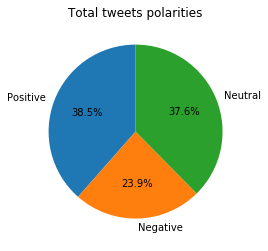

In [16]:
#Pie chart showing the percentage of tweets polarity
import matplotlib.pyplot as plt

number_of_tweets = [385, 239, 376]
polarity = ['Positive', 'Negative', 'Neutral']
plt.pie(number_of_tweets, labels=polarity, startangle=90, autopct='%.1f%%')
plt.title('Total tweets polarities')
plt.show()